In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline


# Models from Scikit-Learn:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
df = pd. read_csv("Demo_Data_Loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


# Data Pre-Processing 

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan Approved         0
dtype: int64

In [4]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan Approved      367 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 37.4+ KB


<AxesSubplot:>

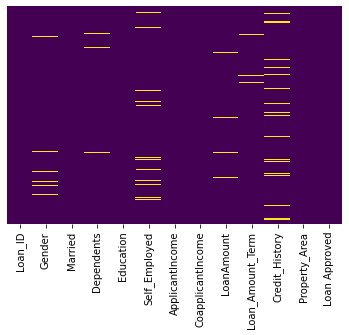

In [5]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [6]:
df. describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved
count,367.000000,367.000000,362.000000,361.000000,338.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444,0.070845
std,4910.685399,2334.232099,61.366652,65.156643,0.380150,0.256915
min,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000,0.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000,0.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000,1.000000


In [7]:
df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan Approved         0
dtype: int64

In [8]:
#df_clean.isna().sum()

In [9]:
# Here I am going to replace to numerical null values:

# Replacing LoanAmount , Loan_Amount_Term & Credit_History with the mean value of these column

df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())

df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())

df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())

In [10]:
df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan Approved         0
dtype: int64

In [11]:
df.value_counts()

Loan_ID   Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan Approved
LP001015  Male    Yes      0           Graduate      No             5720             0                  110.0       360.000000        1.000000        Urban          0                1
LP002253  Female  No       1           Graduate      No             5062             0                  152.0       300.000000        1.000000        Rural          1                1
LP002344  Male    Yes      0           Graduate      No             3510             828                105.0       360.000000        1.000000        Semiurban      0                1
LP002339  Male    Yes      0           Graduate      No             3887             1517               105.0       360.000000        0.000000        Semiurban      0                1
LP002333  Male    No       0           Not Graduate  No             3844             

In [12]:
# Here I'm gonna replace the missing values with the most occurring class for the categorical features

df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [13]:
df. isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan Approved        0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

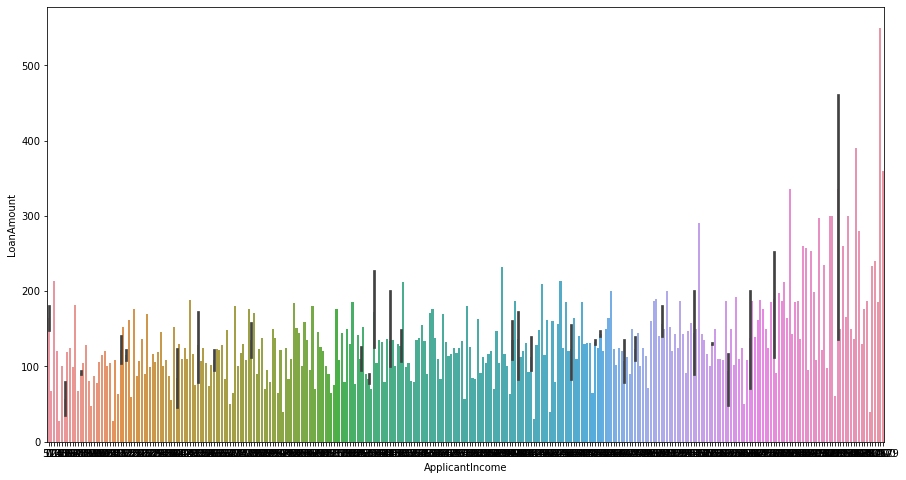

In [14]:

plt.figure(figsize =(15,8))
sns. barplot(y = "LoanAmount", x = "ApplicantIncome", data = df)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

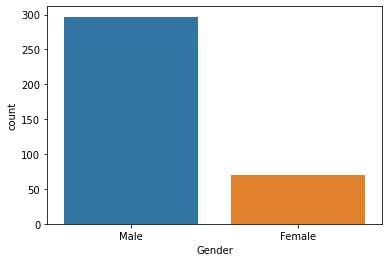

In [15]:
sns.countplot(df["Gender"])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

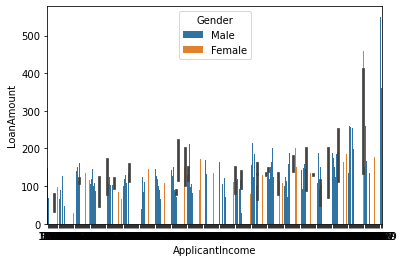

In [16]:
sns. barplot( x = 'ApplicantIncome',y = 'LoanAmount', hue = 'Gender', data = df)

Observation: Maximum applicants for loan are Male

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

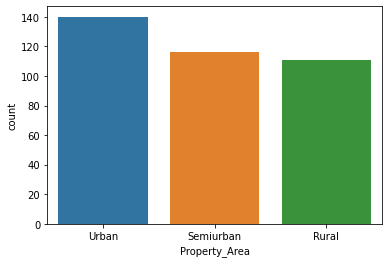

In [17]:
sns.countplot(df["Property_Area"])

**Observation: The majority of the applicnts are from Urban; though they are equally distributed**
    

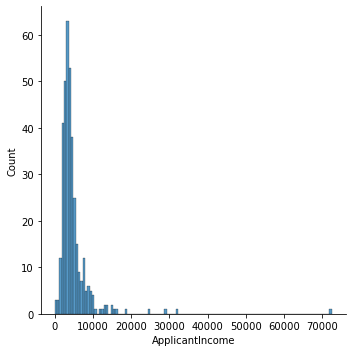

In [18]:
sns.displot(df['ApplicantIncome'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

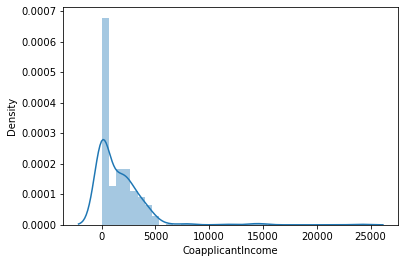

In [19]:
sns.distplot(df["CoapplicantIncome"])

**Observation: Here, Most of applicants income are in between 0 to 10000 & Co-applicants are between 0 to 5000
It shows that both have right skewed curve and to get rid from that I am gonna aplly log-transformation**

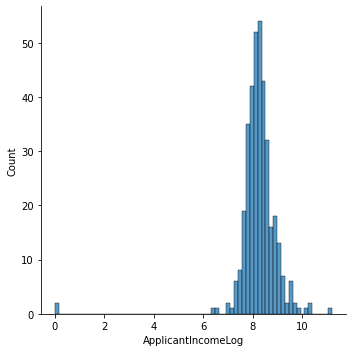

In [20]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.displot(df["ApplicantIncomeLog"])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

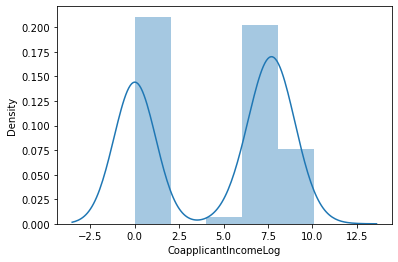

In [21]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

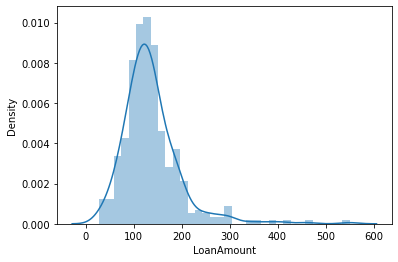

In [22]:
sns.distplot(df["LoanAmount"])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

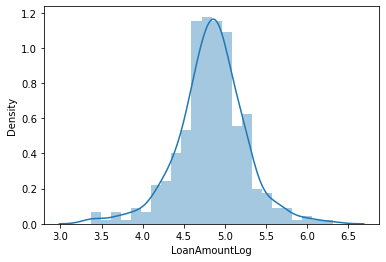

In [23]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

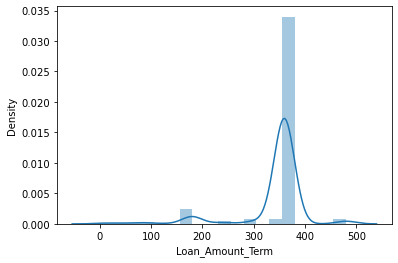

In [24]:
sns.distplot(df['Loan_Amount_Term'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

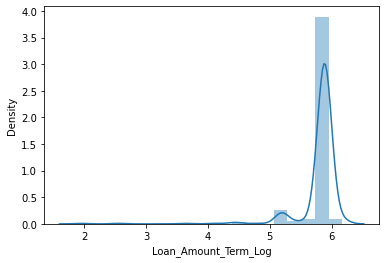

In [25]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

In [26]:
#Combining ApplicantIncome & CoapplicantIncome in a single column
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

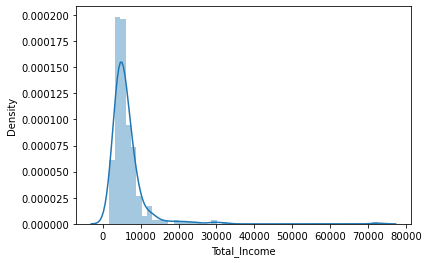

In [27]:
sns.distplot(df["Total_Income"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Count'>

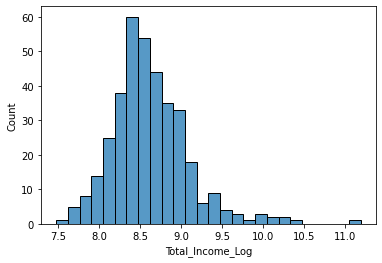

In [28]:
df["Total_Income_Log"] = np.log(df["Total_Income"]+1)
sns.histplot(df["Total_Income_Log"])

# Correlation Matrix

In [29]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income,Total_Income_Log
ApplicantIncome,1.000000,-0.110335,0.490174,0.023187,0.094083,-0.021545,0.577529,-0.253455,0.371995,0.013109,0.894934,0.683273
CoapplicantIncome,-0.110335,1.000000,0.150112,-0.010940,-0.066798,-0.029227,-0.361136,0.663430,0.161301,0.002129,0.344733,0.447960
LoanAmount,0.490174,0.150112,1.000000,0.093856,-0.011405,0.031331,0.319118,0.086091,0.926380,0.056736,0.530345,0.605254
Loan_Amount_Term,0.023187,-0.010940,0.093856,1.000000,-0.052370,0.001650,0.005103,-0.015743,0.145803,0.901031,0.016988,0.000203
Credit_History,0.094083,-0.066798,-0.011405,-0.052370,1.000000,-0.023634,0.149816,-0.065631,-0.051179,0.001391,0.058870,0.069113
Loan Approved,-0.021545,-0.029227,0.031331,0.001650,-0.023634,1.000000,0.016753,-0.021536,0.040254,-0.015167,-0.033470,-0.015452
ApplicantIncomeLog,0.577529,-0.361136,0.319118,0.005103,0.149816,0.016753,1.000000,-0.313535,0.265954,-0.003476,0.383329,0.472863
CoapplicantIncomeLog,-0.253455,0.663430,0.086091,-0.015743,-0.065631,-0.021536,-0.313535,1.000000,0.138816,-0.007431,0.058461,0.201044
LoanAmountLog,0.371995,0.161301,0.926380,0.145803,-0.051179,0.040254,0.265954,0.138816,1.000000,0.092090,0.423752,0.560909
Loan_Amount_Term_Log,0.013109,0.002129,0.056736,0.901031,0.001391,-0.015167,-0.003476,-0.007431,0.092090,1.000000,0.013337,-0.004052


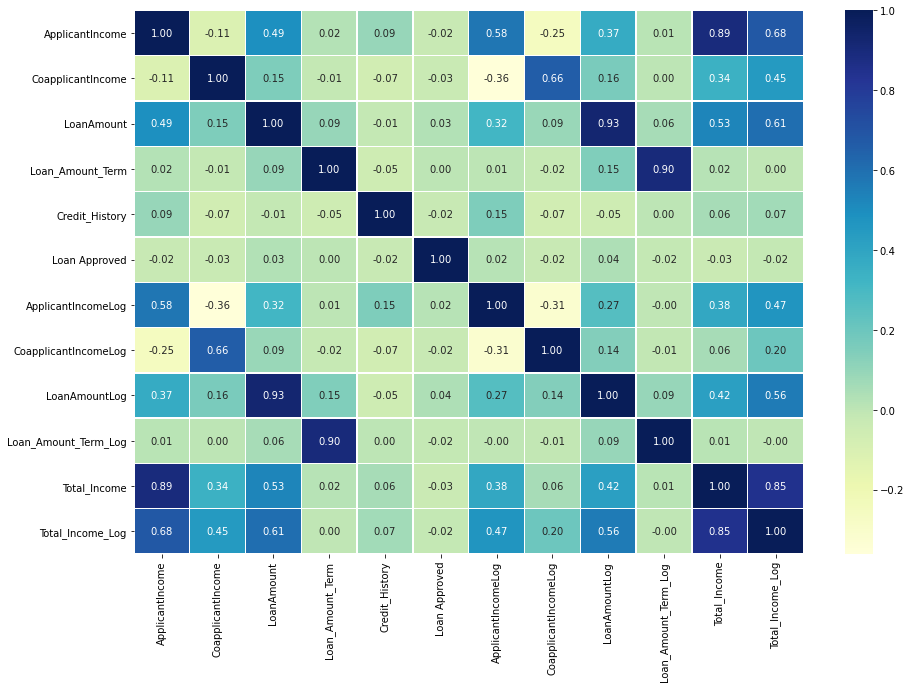

In [30]:
# Let's make it more prettier
corr_matrix = df. corr()
fig, ax = plt. subplots(figsize = (15, 10))
ax = sns. heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = '.2f',
                 cmap = 'YlGnBu')

In [31]:
df. head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income,Total_Income_Log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,0,8.651899,0.000000,4.709530,5.888878,5720,8.651899
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,0,8.031710,7.313887,4.844187,5.888878,4576,8.428799
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,0,8.517393,7.496097,5.342334,5.888878,6800,8.824825
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,0,7.758333,7.842671,4.615121,5.888878,4886,8.494334
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,0,8.094684,0.000000,4.369448,5.888878,3276,8.094684


In [32]:
# Droping unnecessary columns

un_cols = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'CoapplicantIncomeLog']

df = df.drop(columns=un_cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan Approved,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,Yes,0,Graduate,No,1.000000,Urban,0,8.651899,4.709530,5.888878,8.651899
1,Male,Yes,1,Graduate,No,1.000000,Urban,0,8.031710,4.844187,5.888878,8.428799
2,Male,Yes,2,Graduate,No,1.000000,Urban,0,8.517393,5.342334,5.888878,8.824825
3,Male,Yes,2,Graduate,No,0.825444,Urban,0,7.758333,4.615121,5.888878,8.494334
4,Male,No,0,Not Graduate,No,1.000000,Urban,0,8.094684,4.369448,5.888878,8.094684


In [33]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan Approved,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,1,0,0,0,1.000000,2,0,8.651899,4.709530,5.888878,8.651899
1,1,1,1,0,0,1.000000,2,0,8.031710,4.844187,5.888878,8.428799
2,1,1,2,0,0,1.000000,2,0,8.517393,5.342334,5.888878,8.824825
3,1,1,2,0,0,0.825444,2,0,7.758333,4.615121,5.888878,8.494334
4,1,0,0,1,0,1.000000,2,0,8.094684,4.369448,5.888878,8.094684


# Modeling

In [35]:
x =df.drop(columns =['Loan Approved'], axis = 1)

y =df['Loan Approved']

In [36]:
# Splitting data into train & test
from sklearn.model_selection import train_test_split
np. random. seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.2)

In [37]:
x. head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,1,0,0,0,1.000000,2,8.651899,4.709530,5.888878,8.651899
1,1,1,1,0,0,1.000000,2,8.031710,4.844187,5.888878,8.428799
2,1,1,2,0,0,1.000000,2,8.517393,5.342334,5.888878,8.824825
3,1,1,2,0,0,0.825444,2,7.758333,4.615121,5.888878,8.494334
4,1,0,0,1,0,1.000000,2,8.094684,4.369448,5.888878,8.094684


In [38]:
y

0      0
1      0
2      0
3      0
4      0
      ..
362    0
363    0
364    0
365    0
366    0
Name: Loan Approved, Length: 367, dtype: int64

# We are gonna try 3 different models:
    1. Logistic Regression
    2. K- Nearest Neigbours Classifier
    3. Random Forest Classifier

In [39]:
# Putting Models in a dictionary

models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# Creating a function to fit and score models

def fit_and_score(models, x_train, x_test, y_train, y_test):
    #set random seed
    np. random. seed(42)
    
    #Making a dict to keep model scores
    model_scores = {}
    #Looping through models
    for name, model in models. items():
        
        model. fit(x_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
        
    return model_scores
    

In [40]:
model_scores = fit_and_score(models = models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

{'Logistic Regression': 0.9324324324324325,
 'KNN': 0.9324324324324325,
 'Random Forest': 0.9324324324324325}

<AxesSubplot:>

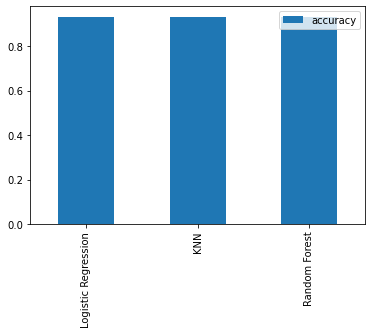

In [41]:
model_compare = pd. DataFrame(model_scores, index = ['accuracy'])
model_compare. T. plot.bar() 

In [42]:
# Tuning KNN

train_scores = []
test_scores = []

# Creating a list of different values for n_neighbors
neighbors = range(1, 21)

knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn. set_params(n_neighbors = i)
    # Fitting the algorithm
    knn. fit(x_train, y_train)
    
    # Updating the training scores list
    train_scores. append(knn. score(x_train, y_train))
    
    # Updating the test scores list
    test_scores. append(knn. score(x_test, y_test))

In [43]:
train_scores

[1.0,
 0.9351535836177475,
 0.9351535836177475,
 0.9283276450511946,
 0.9283276450511946,
 0.9283276450511946,
 0.9283276450511946,
 0.9283276450511946,
 0.9283276450511946,
 0.9283276450511946,
 0.9283276450511946,
 0.9283276450511946,
 0.9283276450511946,
 0.9283276450511946,
 0.9283276450511946,
 0.9283276450511946,
 0.9283276450511946,
 0.9283276450511946,
 0.9283276450511946,
 0.9283276450511946]

In [44]:
test_scores

[0.9054054054054054,
 0.918918918918919,
 0.918918918918919,
 0.9324324324324325,
 0.9324324324324325,
 0.9324324324324325,
 0.9324324324324325,
 0.9324324324324325,
 0.9324324324324325,
 0.9324324324324325,
 0.9324324324324325,
 0.9324324324324325,
 0.9324324324324325,
 0.9324324324324325,
 0.9324324324324325,
 0.9324324324324325,
 0.9324324324324325,
 0.9324324324324325,
 0.9324324324324325,
 0.9324324324324325]

Maximum KNN score on the test data:  93.24%


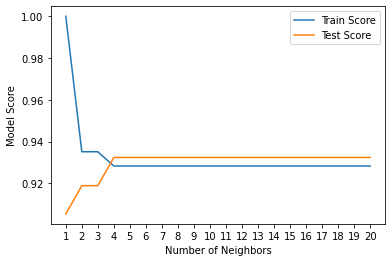

In [45]:
plt. plot(neighbors, train_scores, label = "Train Score")
plt. plot(neighbors, test_scores, label = 'Test Score')
plt. xlabel("Number of Neighbors")
plt. ylabel("Model Score")
plt. legend()
plt. xticks(np. arange(1, 21, 1))

print(f"Maximum KNN score on the test data: {max(test_scores)* 100: .2f}%")

# Hypermrameter tuning with RandomizedSearchCV

In [46]:
# Creating Hyperparameter grid for LogisticRegressions

log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver" : ['liblinear']}

# Creating Hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth" : [None, 3, 5, 10],
          "min_samples_split" : np.arange(2, 20, 2),
          "min_samples_leaf" : np.arange(1, 20, 2)}

In [47]:
# Tuning LogisticRegression

np. random. seed(42)

# Setting up hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

# fitting random hyperparameter search model for LogisticRegression

rs_log_reg. fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [48]:
rs_log_reg. best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [49]:
rs_log_reg. score(x_test, y_test)

0.9324324324324325

In [50]:
#For RandomForestClassifier

np. random.seed(42)

# Set up hyperparameter search for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= rf_grid,
                          cv = 5, 
                          n_iter = 20,
                          verbose = True)

rs_rf. fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [51]:
rs_rf. best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [52]:
rs_rf. score(x_test, y_test)

0.9324324324324325

# Evaluating this tuned machine learning classifier


* Confusion matrix 
* Classification report
* Precision
* Recall
* F1-score

... And it'd be great if Cross-Validation was used where possible

To make comparisons and evaluate this trained model, first it needs prediction  


In [53]:
# Making predictions with tuned model
y_preds = rs_log_reg. predict(x_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [54]:
# Confusion matrix

print(confusion_matrix(y_test, y_preds))

[[69  0]
 [ 5  0]]


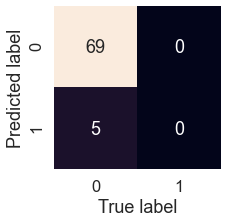

In [55]:
sns. set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    
    """
    plots a nice looking confusion matrix using Seaborn heatmap() 
    
    """
    fig, ax = plt. subplots(figsize = (3, 3))
    ax = sns. heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    
    plt. xlabel("True label")
    plt. ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)
    

# Training Loss

In [66]:
from sklearn.metrics import mean_squared_error
sklearn.metrics.mean_squared_error(y_test, y_preds)

0.06756756756756757

In [67]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        69
           1       0.00      0.00      0.00         5

    accuracy                           0.93        74
   macro avg       0.47      0.50      0.48        74
weighted avg       0.87      0.93      0.90        74



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
